In [1]:
import os
import json
import glob
import numpy as np
import pandas as pd
from skimage import measure
import SimpleITK as sitk
from tqdm.notebook import tqdm 
from skimage.transform import resize
import cv2

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'SimpleITK'

# Data Prepare
## 구조
### .dcm
#### -------(실제 픽셀 거리값, 이미지 축소 비율(512로 축소한다 가정),  실제 label 값 구함) ----
### label.npy , reduce_ratio.npy, pixel_spacing.npy, file_name.npy 
#### -------(이미지 resize, 차원 맞춤) ----
### image.npy test_img.npy
#### -------(train ,  validate , test data load, scaling) ----
### X_train, Y_train, X_valid, Y_valid, X_test, Y_test

### + 이미지 오차 평가 함수

## 0. label 파일 만들기
### 1) train label
* 실제 픽셀 거리값, 이미지 축소 비율, 이미지 라벨 이름, 라벨링 파일 생성

In [3]:
import json
import glob
import numpy as np
from tqdm import tqdm_notebook

dcm_list = sorted(glob.glob('../train/*.dcm'))
json_list = sorted(glob.glob('../train/*.json'))

label = np.zeros((240,8,2))
reduce_ratio = np.zeros((240,2))
pixel_spacing = np.zeros((240,2))
file_name = []

for i in tqdm(range(len(json_list))):
    
    try:
        
        file_name.append(dcm_list[i].split('/')[-1].split('.')[0])
        
        image_dummy = sitk.ReadImage(dcm_list[i])
        
        x_spacing = image_dummy.GetSpacing()[0]
        y_spacing = image_dummy.GetSpacing()[1]
        
        pixel_spacing[i,0] = x_spacing
        pixel_spacing[i,1] = y_spacing

        image_dummy = sitk.GetArrayFromImage(image_dummy).transpose(2,1,0)
    
        
        x_coor_reduce_ratio = 512 / image_dummy.shape[0]

        y_coor_reduce_ratio = 512 / image_dummy.shape[1]
        
        reduce_ratio[i,0] = x_coor_reduce_ratio
        reduce_ratio[i,1] = y_coor_reduce_ratio
        
        
        with open(json_list[i], "r") as josn_dummy:

            josn_dummy = json.load(josn_dummy)


        point_1 = [josn_dummy['annotation']['ANNOTATION_DATA'][0]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][0]['vs']['y']]
        point_2 = [josn_dummy['annotation']['ANNOTATION_DATA'][0]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][0]['ve']['y']]

        point_3 = [josn_dummy['annotation']['ANNOTATION_DATA'][1]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][1]['vs']['y']]
        point_4 = [josn_dummy['annotation']['ANNOTATION_DATA'][1]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][1]['ve']['y']]

        point_5 = [josn_dummy['annotation']['ANNOTATION_DATA'][2]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][2]['vs']['y']]
        point_6 = [josn_dummy['annotation']['ANNOTATION_DATA'][2]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][2]['ve']['y']]

        point_7 = [josn_dummy['annotation']['ANNOTATION_DATA'][3]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][3]['vs']['y']]
        point_8 = [josn_dummy['annotation']['ANNOTATION_DATA'][3]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][3]['ve']['y']]

        
        label[i, 0, 0] = point_1[0] * x_coor_reduce_ratio
        label[i, 0, 1] = point_1[1] * y_coor_reduce_ratio

        label[i, 1, 0] = point_2[0] * x_coor_reduce_ratio
        label[i, 1, 1] = point_2[1] * y_coor_reduce_ratio

        label[i, 2, 0] = point_3[0] * x_coor_reduce_ratio
        label[i, 2, 1] = point_3[1] * y_coor_reduce_ratio

        label[i, 3, 0] = point_4[0] * x_coor_reduce_ratio
        label[i, 3, 1] = point_4[1] * y_coor_reduce_ratio

        label[i, 4, 0] = point_5[0] * x_coor_reduce_ratio
        label[i, 4, 1] = point_5[1] * y_coor_reduce_ratio

        label[i, 5, 0] = point_6[0] * x_coor_reduce_ratio
        label[i, 5, 1] = point_6[1] * y_coor_reduce_ratio

        label[i, 6, 0] = point_7[0] * x_coor_reduce_ratio
        label[i, 6, 1] = point_7[1] * y_coor_reduce_ratio

        label[i, 7, 0] = point_8[0] * x_coor_reduce_ratio
        label[i, 7, 1] = point_8[1] * y_coor_reduce_ratio
    
    except:
        
        print('Error_File_Path: ', json_list[i], '     ', 'Indexing_Number: ', i)
        
        pass

# save numpy array
np.save('../dataset/label.npy', label)
np.save('../dataset/reduce_ratio.npy', reduce_ratio)
np.save('../dataset/pixel_spacing.npy', pixel_spacing)
np.save('../dataset/file_name.npy', file_name)

ModuleNotFoundError: No module named 'tqdm'


### 2) test label
* 실제 픽셀 거리값, 이미지 축소 비율, 이미지 라벨 이름, 라벨링 파일 생성

In [6]:
import json
import glob
import numpy as np
from tqdm import tqdm_notebook

dcm_list = sorted(glob.glob('../test/*.dcm'))
json_list = sorted(glob.glob('../test/*.json'))

label = np.zeros((56,8,2))
reduce_ratio = np.zeros((56,2))
pixel_spacing = np.zeros((56,2))
file_name = []

for i in tqdm(range(len(json_list))):
    
    try:
        
        file_name.append(dcm_list[i].split('/')[-1].split('.')[0])
        
        image_dummy = sitk.ReadImage(dcm_list[i])
        
        x_spacing = image_dummy.GetSpacing()[0]
        y_spacing = image_dummy.GetSpacing()[1]
        
        pixel_spacing[i,0] = x_spacing
        pixel_spacing[i,1] = y_spacing

        image_dummy = sitk.GetArrayFromImage(image_dummy).transpose(2,1,0)
    
        
        x_coor_reduce_ratio = 512 / image_dummy.shape[0]

        y_coor_reduce_ratio = 512 / image_dummy.shape[1]
        
        reduce_ratio[i,0] = x_coor_reduce_ratio
        reduce_ratio[i,1] = y_coor_reduce_ratio
        
        
        with open(json_list[i], "r") as josn_dummy:

            josn_dummy = json.load(josn_dummy)


        point_1 = [josn_dummy['annotation']['ANNOTATION_DATA'][0]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][0]['vs']['y']]
        point_2 = [josn_dummy['annotation']['ANNOTATION_DATA'][0]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][0]['ve']['y']]

        point_3 = [josn_dummy['annotation']['ANNOTATION_DATA'][1]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][1]['vs']['y']]
        point_4 = [josn_dummy['annotation']['ANNOTATION_DATA'][1]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][1]['ve']['y']]

        point_5 = [josn_dummy['annotation']['ANNOTATION_DATA'][2]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][2]['vs']['y']]
        point_6 = [josn_dummy['annotation']['ANNOTATION_DATA'][2]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][2]['ve']['y']]

        point_7 = [josn_dummy['annotation']['ANNOTATION_DATA'][3]['vs']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][3]['vs']['y']]
        point_8 = [josn_dummy['annotation']['ANNOTATION_DATA'][3]['ve']['x'], josn_dummy['annotation']['ANNOTATION_DATA'][3]['ve']['y']]

        
        label[i, 0, 0] = point_1[0] * x_coor_reduce_ratio
        label[i, 0, 1] = point_1[1] * y_coor_reduce_ratio

        label[i, 1, 0] = point_2[0] * x_coor_reduce_ratio
        label[i, 1, 1] = point_2[1] * y_coor_reduce_ratio

        label[i, 2, 0] = point_3[0] * x_coor_reduce_ratio
        label[i, 2, 1] = point_3[1] * y_coor_reduce_ratio

        label[i, 3, 0] = point_4[0] * x_coor_reduce_ratio
        label[i, 3, 1] = point_4[1] * y_coor_reduce_ratio

        label[i, 4, 0] = point_5[0] * x_coor_reduce_ratio
        label[i, 4, 1] = point_5[1] * y_coor_reduce_ratio

        label[i, 5, 0] = point_6[0] * x_coor_reduce_ratio
        label[i, 5, 1] = point_6[1] * y_coor_reduce_ratio

        label[i, 6, 0] = point_7[0] * x_coor_reduce_ratio
        label[i, 6, 1] = point_7[1] * y_coor_reduce_ratio

        label[i, 7, 0] = point_8[0] * x_coor_reduce_ratio
        label[i, 7, 1] = point_8[1] * y_coor_reduce_ratio
    
    except:
        
        print('Error_File_Path: ', json_list[i], '     ', 'Indexing_Number: ', i)
        
        pass

# save numpy array
np.save('../dataset/test_label.npy', label)
np.save('../dataset/test_reduce_ratio.npy', reduce_ratio)
np.save('../dataset/test_pixel_spacing.npy', pixel_spacing)
np.save('../dataset/test_file_name.npy', file_name)

ModuleNotFoundError: No module named 'tqdm'

## 1. train, test data set 만들기
### 1) train data
* image resize
* 차원 맞춰줌

### 내가 할거
* augmentation 추가 (labe 파일 생성 다시)
* 선명도 추가

In [5]:
import cv2
import numpy as np
import SimpleITK as sitk

from tqdm import tqdm_notebook


dcm_list = sorted(glob.glob('../train/*.dcm'))

image_array = np.zeros((240,512,512,1), dtype=np.uint8)


for i in tqdm(range(len(dcm_list))):

    image_dummy = sitk.ReadImage(dcm_list[i])

    image_dummy = sitk.GetArrayFromImage(image_dummy).transpose(2,1,0)

    image_dummy = cv2.resize(image_dummy, dsize=(512,512))
    
    image_dummy = cv2.resize(image_dummy, dsize=(512,512)) ## resize 두번?? 잘못쓴거같음

    image_dummy = np.expand_dims(image_dummy, axis=2)
   
    image_array[i] = image_dummy
    
    
# save numpy array
np.save('../dataset/image.npy', image_array)

ModuleNotFoundError: No module named 'SimpleITK'

### 1) test data
* image resize
* 차원 맞춰줌

### 내가 할거
* augmentation 추가 (labe 파일 생성 다시)
* 선명도 추가

In [7]:
import cv2
import numpy as np
import SimpleITK as sitk

from tqdm import tqdm_notebook


dcm_list = sorted(glob.glob('../test/*.dcm'))

image_array = np.zeros((60,512,512,1), dtype=np.uint8)


for i in tqdm(range(len(dcm_list))):

    image_dummy = sitk.ReadImage(dcm_list[i])

    image_dummy = sitk.GetArrayFromImage(image_dummy).transpose(2,1,0)

    image_dummy = cv2.resize(image_dummy, dsize=(512,512))
    
    image_dummy = cv2.resize(image_dummy, dsize=(512,512))

    image_dummy = np.expand_dims(image_dummy, axis=2)
   
    image_array[i] = image_dummy
    
    
# save numpy array
np.save('../dataset/test_image.npy', image_array)

ModuleNotFoundError: No module named 'SimpleITK'

## 2. Data Load
* train -> train, val 나눔
* data, label 둘다  max값으로 scaling

In [8]:
image_array = np.load('../dataset/image.npy')
label_array = np.load('../dataset/label.npy').reshape(-1, 16)
test_image_array = np.load('../dataset/test_image.npy')
test_label_array = np.load('../dataset/test_label.npy').reshape(-1, 16)

# Normalization
X_train = image_array[:180] / 255
y_train = label_array[:180] / 512

X_valid = image_array[180:240] / 255
y_valid = label_array[180:240] / 512

X_test = test_image_array[:] / 255
y_test = test_label_array[:] / 512


# Model
model = landmark_cnn()
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/image.npy'

# Train.iypnb

In [ ]:
import os 
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.models import *

from tensorflow.python.keras.utils.generic_utils import get_custom_objects

os.environ["CUDA_VISIBLE_DEVICES"]="0"


# Settings
INPUT_SHAPE = (512, 512, 1)
OUTPUT_SIZE = 16


# Create Model
def landmark_cnn(input_shape=INPUT_SHAPE, output_size=OUTPUT_SIZE):

    img_input = Input(shape=input_shape)
    

    x = Conv2D(16, (3,3), strides=(1,1), name='Conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu', name='Relu_conv1')(x)
    
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='Pool1')(x)


    x = Conv2D(32, (3,3), strides=(1,1), name='Conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu', name='Relu_conv2')(x)
    
    x = Conv2D(64, (3,3), strides=(1,1), name='Conv3')(x)
    x = BatchNormalization()(x)
    x = Activation('relu', name='Relu_conv3')(x)
    
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='Pool2')(x)


    x = Conv2D(32, (3,3), strides=(1,1), name='Conv4')(x)
    x = BatchNormalization()(x)
    x = Activation('relu', name='Relu_conv4')(x)
    
    x = Conv2D(32, (3,3), strides=(1,1), name='Conv5')(x)
    x = BatchNormalization()(x)
    x = Activation('relu', name='Relu_conv5')(x)
    
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2), name='Pool3')(x)
        

    x = Conv2D(64, (3,3), strides=(1,1), name='Conv6')(x)
    x = BatchNormalization()(x)
    x = Activation('relu', name='Relu_conv6')(x)
    
    x = Dropout(0.2)(x)
    
    x = Flatten(name='Flatten')(x)
    x = Dense(128, activation='relu', name='FC1')(x)
    x = Dense(output_size, activation=None, name='Predictions')(x)
    
    
    model = Model([img_input], x, name='Landmark_model')
    
    return model

# Load Data
image_array = np.load('../dataset/image.npy')
label_array = np.load('../dataset/label.npy').reshape(-1, 16)
test_image_array = np.load('../dataset/test_image.npy')
test_label_array = np.load('../dataset/test_label.npy').reshape(-1, 16)

# Normalization
X_train = image_array[:180] / 255
y_train = label_array[:180] / 512

X_valid = image_array[180:240] / 255
y_valid = label_array[180:240] / 512

X_test = test_image_array[:] / 255
y_test = test_label_array[:] / 512


# Model
model = landmark_cnn()
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )


# Call Back
monitor = 'val_loss'

reduce_lr = ReduceLROnPlateau(monitor=monitor, factor=0.1, patience=10, min_lr=0.0000001,verbose=1)
earlystopper = EarlyStopping(monitor=monitor, patience=50, verbose=1)
model_checkpoint = ModelCheckpoint(filepath = '../result/model_save/landmark_model_1.h5', verbose=1, save_best_only=True)

callbacks_list = [reduce_lr, model_checkpoint, earlystopper]


# Train
history = model.fit(X_train, y_train, batch_size=20, epochs=1000, shuffle=True, verbose=1, 
                    validation_data=(X_test, y_test), callbacks=callbacks_list)


# Predict
pred = model.predict(X_test)

# Save Prediction
np.save('../result/predict/predict.npy', pred)
pred[0]
y_test[0]

# Evaluation.iypnb

In [ ]:
# 딥러닝 모델 결과 검증코드

import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score

point_1_distance_error = []
point_2_distance_error = []
point_3_distance_error = []
point_4_distance_error = []
point_5_distance_error = []
point_6_distance_error = []
point_7_distance_error = []
point_8_distance_error = []


original_size_label = np.zeros((60, 8, 2))


predict = np.load('../result/predict/predict.npy')
label = np.load('../dataset/test_label.npy')

file_name = np.load('../dataset/test_file_name.npy')
reduce_ratio = np.load('../dataset/test_reduce_ratio.npy')
pixel_spacing = np.load('../dataset/test_pixel_spacing.npy')


original_size_predict = predict * 512
original_size_predict = original_size_predict.reshape(60, 8, 2)


for i in tqdm(range(predict.shape[0])):

    x_reduce_ratio = reduce_ratio[i][0]
    y_reduce_ratio = reduce_ratio[i][1]

    original_size_label[i][:, 0] = label[i][:, 0] / x_reduce_ratio
    original_size_label[i][:, 1] = label[i][:, 1] / y_reduce_ratio

    original_size_predict[i][:,
                             0] = original_size_predict[i][:, 0] / x_reduce_ratio
    original_size_predict[i][:,
                             1] = original_size_predict[i][:, 1] / y_reduce_ratio

    point_1_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][0] - original_size_predict[i]
                                                                 [:, 0][0])**2 + (original_size_label[i][:, 1][0] - original_size_predict[i][:, 1][0])**2))
    point_2_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][1] - original_size_predict[i]
                                                                 [:, 0][1])**2 + (original_size_label[i][:, 1][1] - original_size_predict[i][:, 1][1])**2))
    point_3_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][2] - original_size_predict[i]
                                                                 [:, 0][2])**2 + (original_size_label[i][:, 1][2] - original_size_predict[i][:, 1][2])**2))
    point_4_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][3] - original_size_predict[i]
                                                                 [:, 0][3])**2 + (original_size_label[i][:, 1][3] - original_size_predict[i][:, 1][3])**2))

    point_5_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][4] - original_size_predict[i]
                                                                 [:, 0][4])**2 + (original_size_label[i][:, 1][4] - original_size_predict[i][:, 1][4])**2))
    point_6_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][5] - original_size_predict[i]
                                                                 [:, 0][5])**2 + (original_size_label[i][:, 1][5] - original_size_predict[i][:, 1][5])**2))
    point_7_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][6] - original_size_predict[i]
                                                                 [:, 0][6])**2 + (original_size_label[i][:, 1][6] - original_size_predict[i][:, 1][6])**2))
    point_8_distance_error.append(pixel_spacing[i][0] * np.sqrt((original_size_label[i][:, 0][7] - original_size_predict[i]
                                                                 [:, 0][7])**2 + (original_size_label[i][:, 1][7] - original_size_predict[i][:, 1][7])**2))


point_1_mean, point_1_std = np.round(
    np.mean(point_1_distance_error), 3), np.round(np.std(point_1_distance_error), 3)
point_2_mean, point_2_std = np.round(
    np.mean(point_2_distance_error), 3), np.round(np.std(point_2_distance_error), 3)
point_3_mean, point_3_std = np.round(
    np.mean(point_3_distance_error), 3), np.round(np.std(point_3_distance_error), 3)
point_4_mean, point_4_std = np.round(
    np.mean(point_4_distance_error), 3), np.round(np.std(point_4_distance_error), 3)


point_5_mean, point_5_std = np.round(
    np.mean(point_5_distance_error), 3), np.round(np.std(point_5_distance_error), 3)
point_6_mean, point_6_std = np.round(
    np.mean(point_6_distance_error), 3), np.round(np.std(point_6_distance_error), 3)
point_7_mean, point_7_std = np.round(
    np.mean(point_7_distance_error), 3), np.round(np.std(point_7_distance_error), 3)
point_8_mean, point_8_std = np.round(
    np.mean(point_8_distance_error), 3), np.round(np.std(point_8_distance_error), 3)


print('Point 1 Distance Error: ', point_1_mean, ' ± ', point_1_std, '     (mm)')
print('Point 2 Distance Error: ', point_2_mean, ' ± ', point_2_std, '     (mm)')
print('Point 3 Distance Error: ', point_3_mean, ' ± ', point_3_std, '     (mm)')
print('Point 4 Distance Error: ', point_4_mean, ' ± ', point_4_std, '     (mm)')

print('Point 5 Distance Error: ', point_5_mean, ' ± ', point_5_std, '     (mm)')
print('Point 6 Distance Error: ', point_6_mean, ' ± ', point_6_std, '     (mm)')
print('Point 7 Distance Error: ', point_7_mean, ' ± ', point_7_std, '     (mm)')
print('Point 8 Distance Error: ', point_8_mean, ' ± ', point_8_std, '     (mm)')
# predict = np.load('../result/predict/predict.npy')
# label = np.load('../dataset/label.npy')[240:]

# file_name = np.load('../dataset/file_name.npy')[240:]
# reduce_ratio = np.load('../dataset/reduce_ratio.npy')[240:]
# pixel_spacing = np.load('../dataset/pixel_spacing.npy')[240:]
# 측정된 거리 검증 코드

import numpy as np
from tqdm import tqdm_notebook

label_line_1 = []
label_line_2 = []
label_line_3 = []
label_line_4 = []

pred_line_1 = []
pred_line_2 = []
pred_line_3 = []
pred_line_4 = []

original_size_label = np.zeros((60, 8, 2))


predict = np.load('../result/predict/predict.npy')
label = np.load('../dataset/test_label.npy')


reduce_ratio = np.load('../dataset/test_reduce_ratio.npy')
pixel_spacing = np.load('../dataset/test_pixel_spacing.npy')


original_size_predict = predict * 512
original_size_predict = original_size_predict.reshape(60, 8, 2)


for i in tqdm(range(predict.shape[0])):

    x_reduce_ratio = reduce_ratio[i][0]
    y_reduce_ratio = reduce_ratio[i][1]

    original_size_label[i][:, 0] = label[i][:, 0] / x_reduce_ratio
    original_size_label[i][:, 1] = label[i][:, 1] / y_reduce_ratio

    original_size_predict[i][:,
                             0] = original_size_predict[i][:, 0] / x_reduce_ratio
    original_size_predict[i][:,
                             1] = original_size_predict[i][:, 1] / y_reduce_ratio

    label_line_1.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_label[i][0][0] -
                                                                original_size_label[i][1][0])**2 + (original_size_label[i][0][1] - original_size_label[i][1][1])**2), 3))
    label_line_2.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_label[i][2][0] -
                                                                original_size_label[i][3][0])**2 + (original_size_label[i][2][1] - original_size_label[i][3][1])**2), 3))
    label_line_3.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_label[i][4][0] -
                                                                original_size_label[i][5][0])**2 + (original_size_label[i][4][1] - original_size_label[i][5][1])**2), 3))
    label_line_4.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_label[i][6][0] -
                                                                original_size_label[i][7][0])**2 + (original_size_label[i][6][1] - original_size_label[i][7][1])**2), 3))

    pred_line_1.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_predict[i][0][0] - original_size_predict[i][1][0])**2 + (
        original_size_predict[i][0][1] - original_size_predict[i][1][1])**2), 3))
    pred_line_2.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_predict[i][2][0] - original_size_predict[i][3][0])**2 + (
        original_size_predict[i][2][1] - original_size_predict[i][3][1])**2), 3))
    pred_line_3.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_predict[i][4][0] - original_size_predict[i][5][0])**2 + (
        original_size_predict[i][4][1] - original_size_predict[i][5][1])**2), 3))
    pred_line_4.append(np.round(pixel_spacing[i][0] * np.sqrt((original_size_predict[i][6][0] - original_size_predict[i][7][0])**2 + (
        original_size_predict[i][6][1] - original_size_predict[i][7][1])**2), 3))

print('Line 1 R2 Score: ',r2_score(label_line_1, pred_line_1))
print('Line 2 R2 Score: ',r2_score(label_line_2, pred_line_2))
print('Line 3 R2 Score: ',r2_score(label_line_3, pred_line_3))
print('Line 4 R2 Score: ',r2_score(label_line_4, pred_line_4))

## + 오차 값 구하는 함수
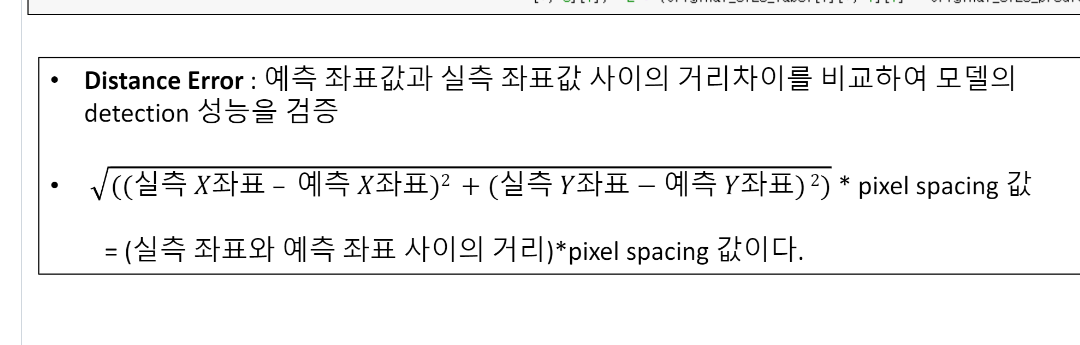

In [ ]:
line_1_distance_error_mean, line_1_distance_error_std = np.round(np.mean(np.abs(np.array(
    label_line_1) - np.array(pred_line_1))), 3), np.round(np.std(np.abs(np.array(label_line_1) - np.array(pred_line_1))), 3)
line_2_distance_error_mean, line_2_distance_error_std = np.round(np.mean(np.abs(np.array(
    label_line_2) - np.array(pred_line_2))), 3), np.round(np.std(np.abs(np.array(label_line_2) - np.array(pred_line_2))), 3)
line_3_distance_error_mean, line_3_distance_error_std = np.round(np.mean(np.abs(np.array(
    label_line_3) - np.array(pred_line_3))), 3), np.round(np.std(np.abs(np.array(label_line_3) - np.array(pred_line_3))), 3)
line_4_distance_error_mean, line_4_distance_error_std = np.round(np.mean(np.abs(np.array(
    label_line_4) - np.array(pred_line_4))), 3), np.round(np.std(np.abs(np.array(label_line_4) - np.array(pred_line_4))), 3)


print('Line 1 Distance Error: ', line_1_distance_error_mean,
      ' ± ', line_1_distance_error_std, '     (mm)')
print('Line 2 Distance Error: ', line_2_distance_error_mean,
      ' ± ', line_2_distance_error_std, '     (mm)')
print('Line 3 Distance Error: ', line_3_distance_error_mean,
      ' ± ', line_3_distance_error_std, '     (mm)')
print('Line 4 Distance Error: ', line_4_distance_error_mean,
      ' ± ', line_4_distance_error_std, '     (mm)')
